In [168]:
#This lab should be submitted as a notebook and an HTML, in the same manner as lab2. Format your HTML as a short report. The focus should be the linear regression and reporting of its results.Scikit-Learn provides toy datasets (list).In this practical lab we will explore a univariate linear regression using the diabetes dataset. Here is a description of the dataset and its columns. Make sure to go over this description, when you start exploring the data.The data can be loaded into a notebook by:from sklearn import datasets diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True).Follow the relevant steps in the Machine Learning Workflow. Steps 1,2,3,6,7 are probably those that you would like to go over. Step 4 is probably not required, given the linear model being used. No need to explore the whole dataset. For data exploration, keep it short 1-3 graphs. The focus is the linear regression, and a presentation of its results.Run a univariate linear regression between bmi body mass index (independent variable) and a quantitative measure of disease progression one year after baseline(this is diabetes_y in the code below - and the dependent variable).Report your results: the model's parameters (slope and intercept), the loss on the train and test datasets, graphs of the training data, test data and the model. Provide your take-aways from the fit. Is it a good one?Notes While partitioning the data to train and test is required for reporting the results on unseen-data-during-training, a validation set is not required. That is, unless you intend to train various models, or test various hyperparameters. These is not an expectation, so most likely a validation set is not needed.
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# step 1: Defining the issue
The goal of this issue is to create a prediction model to forecast diabetes disease progression based on baseline parametersSince the dataset contains labelled data, we can use a supervised learning model and train it on historical data before applying it to current patient data to generate predictions.Each patient is defined by age, sex, body mass index, average blood pressure, six blood serum measures, and a quantitative measure of disease progression one year after baseline in the dataset, which includes 442 diabetic patients.


# Step 2: Load the dataset

In [169]:
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd
import plotly.express as px

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import datasets
from sklearn.metrics import mean_squared_error

# Load the diabetes data
diabetes = datasets.load_diabetes()

# Extract the bmi feature  - 3rd feature
bmi = diabetes.data[:,2]  

# Reshaping the bmi feature to 2d array
bmi = bmi.reshape(-1,1)

# Checking the shape
bmi.shape

(442, 1)

# 3. Explore the data to gain insights
# Converting Array into Data Frame

In [170]:
# Converting into DataFrame
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

# Add the target variable
df['Disease_Progression'] = diabetes.target

# View the DataFrame
df.head()

# Access the BMI feature and target variable
X = bmi
y = diabetes.target

print("X shape :",X.shape)
print("y shape :",y.shape)

X shape : (442, 1)
y shape : (442,)


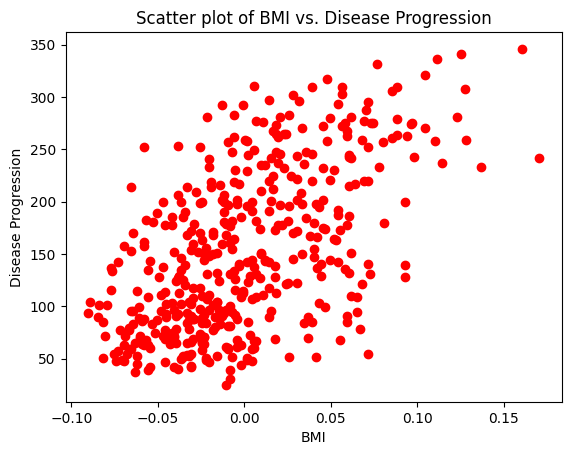

In [171]:
# Scatter plot of BMI vs. Disease Progression
plt.scatter(df['bmi'], df['Disease_Progression'], color="red")
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.title('Scatter plot of BMI vs. Disease Progression')
plt.show()

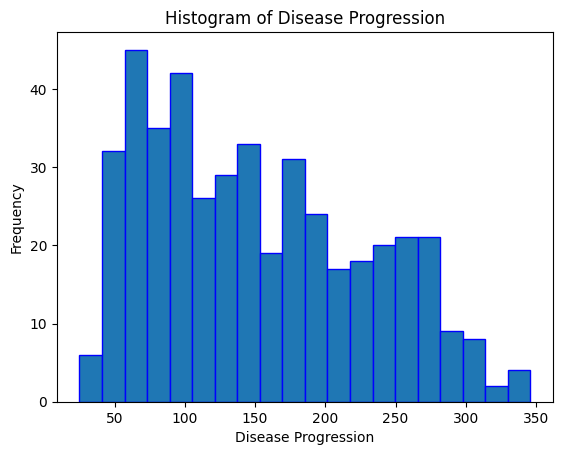

In [172]:
# Histogram of Disease Progression
plt.hist(df['Disease_Progression'], bins=20, edgecolor='blue')
plt.xlabel('Disease Progression')
plt.ylabel('Frequency')
plt.title('Histogram of Disease Progression')
plt.show()


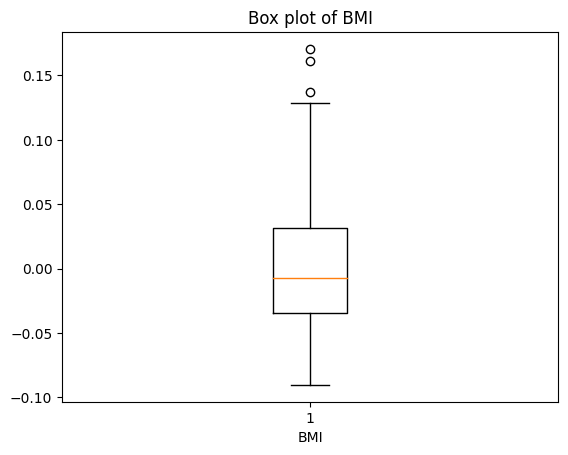

In [173]:
# Box plot of BMI
plt.boxplot(df['bmi'])
plt.xlabel('BMI')
plt.title('Box plot of BMI')
plt.show()

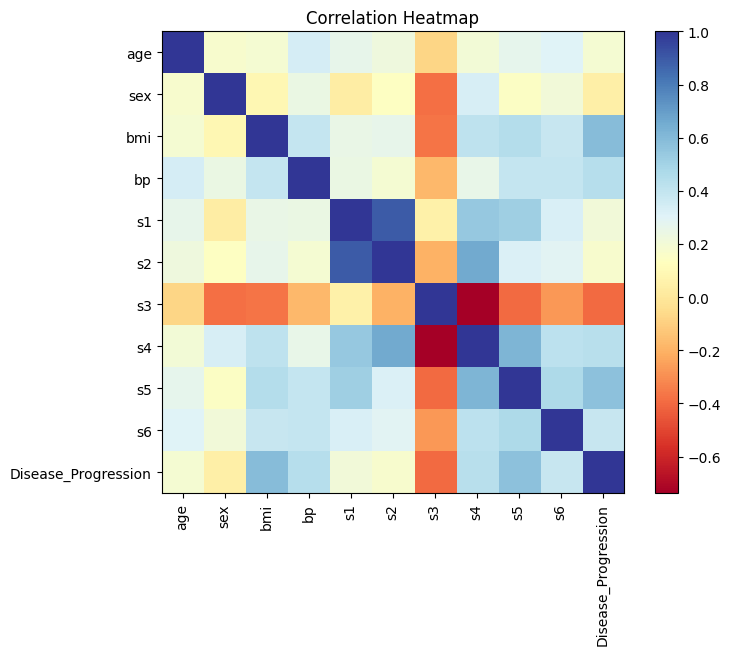

In [174]:
# Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='RdYlBu', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(df.columns)), df.columns, rotation=90)
plt.yticks(range(len(df.columns)), df.columns)
plt.title('Correlation Heatmap')
plt.show()

# Step 6:Developing the Model

In [175]:
#Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(353, 1)
(89, 1)
(353,)
(89,)


In [176]:
# Create a linear regression model
model = LinearRegression()
# Train the model on the training set
model.fit(X_train, y_train)

LinearRegression()

# 7. Presenting the solution

In [177]:
# Making prediction on the test data
y_Pred = model.predict(X_test)
y_Pred[:5]  # Showing 5 predictions

array([145.80622687, 188.85739048, 147.95878505, 203.92529774,
       131.8145987 ])

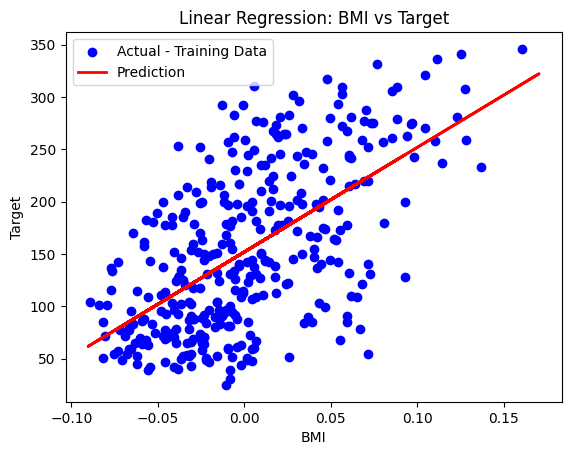

In [178]:

# Plot the scatter plot and linear regression line
plt.scatter(X_train, y_train, color='blue', label='Actual - Training Data')
plt.plot(X_test, y_Pred, color='red', linewidth=2, label='Prediction')
plt.xlabel('BMI')
plt.ylabel('Target')
plt.title('Linear Regression: BMI vs Target')
plt.legend()
plt.show()

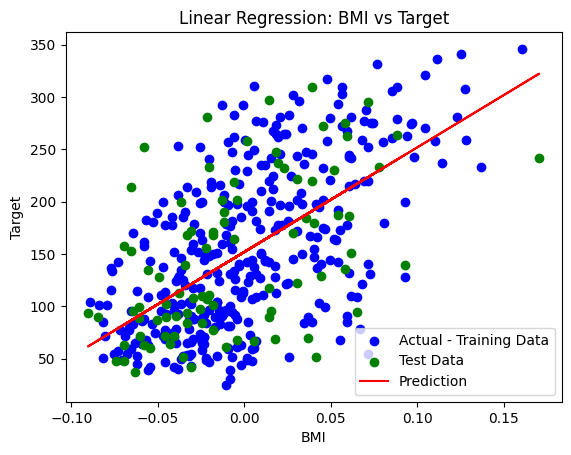

In [179]:
# Plot the scatter plot and linear regression line
plt.scatter(X_train, y_train, color='blue', label='Actual - Training Data')
plt.scatter(X_test, y_test, color='green', label = "Test Data")
plt.plot(X_test, y_Pred, color='red',  label='Prediction')
plt.xlabel('BMI')
plt.ylabel('Target')
plt.title('Linear Regression: BMI vs Target')
plt.legend()
plt.show()

In [180]:
# Making prediction on the train data
y_train_Pred = model.predict(X_train)
y_train_Pred[:5]  # Showing 5 predictions

array([164.10297141, 133.96715688, 201.77273956, 116.74669144,
        86.61087692])

In [181]:
# Get the model's parameters (slope and intercept)
slope = model.coef_[0]
intercept = model.intercept_

In [182]:
# Calculate the loss (mean squared error) on train and test sets
train_loss = mean_squared_error(y_train, y_train_Pred)
test_loss = mean_squared_error(y_test, y_Pred)

In [183]:
# Report the results
print("Model Parameters:")
print("Slope / Coefficient:", slope)
print("Intercept:", intercept)
print("\nLoss on Train Set:", train_loss)
print("Loss on Test Set:", test_loss)

Model Parameters:
Slope / Coefficient: 998.5776891375593
Intercept: 152.00335421448167

Loss on Train Set: 3854.11265207582
Loss on Test Set: 4061.8259284949268


In [184]:

# The mean squared error
mse = metrics.mean_squared_error(y_test, y_Pred)
print('Mean squared error: %.2f' % mse)


Mean squared error: 4061.83


In [185]:
# The mean absolute error
print("Mean absolue error: %.2f" %metrics.mean_absolute_error(y_test, y_Pred))

Mean absolue error: 52.26
